In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

sns.set_theme()
# sns.set(font_scale = 2)

In [25]:
data_df = pd.DataFrame(columns=["system_name", "run_id", "latency", "operation", "on_leader", "n_nodes", "n_clients", "order_on_write"])

for f in glob.glob("results/experiment1_*"):
    temp_df = pd.read_csv(f)
    data_df = data_df.append(temp_df, ignore_index=True)

data_df["latency"] = data_df["latency"]  * 1000

data_df["Node"] = "None"
data_df["Node"] = data_df["on_leader"].apply(lambda x: "Leader" if x else "Follower")
data_df = data_df.rename(columns={"n_nodes": "Nodes", "operation": "Operation"})

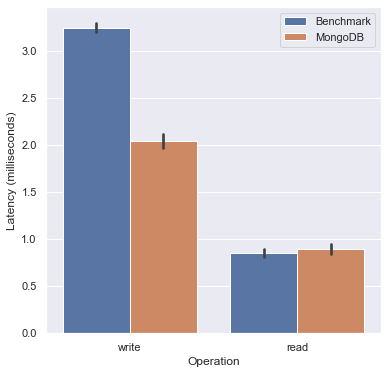

In [26]:
plt.figure(figsize=(6, 6))
ax = sns.barplot(x="Operation", y="latency", hue="order_on_write", hue_order=[True, False], data=data_df)
ax.set(xlabel='Operation', ylabel='Latency (milliseconds)')

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Benchmark', 'MongoDB'])
plt.savefig("results/exp_1_barplot.png", bbox_inches='tight')

<Figure size 576x576 with 0 Axes>

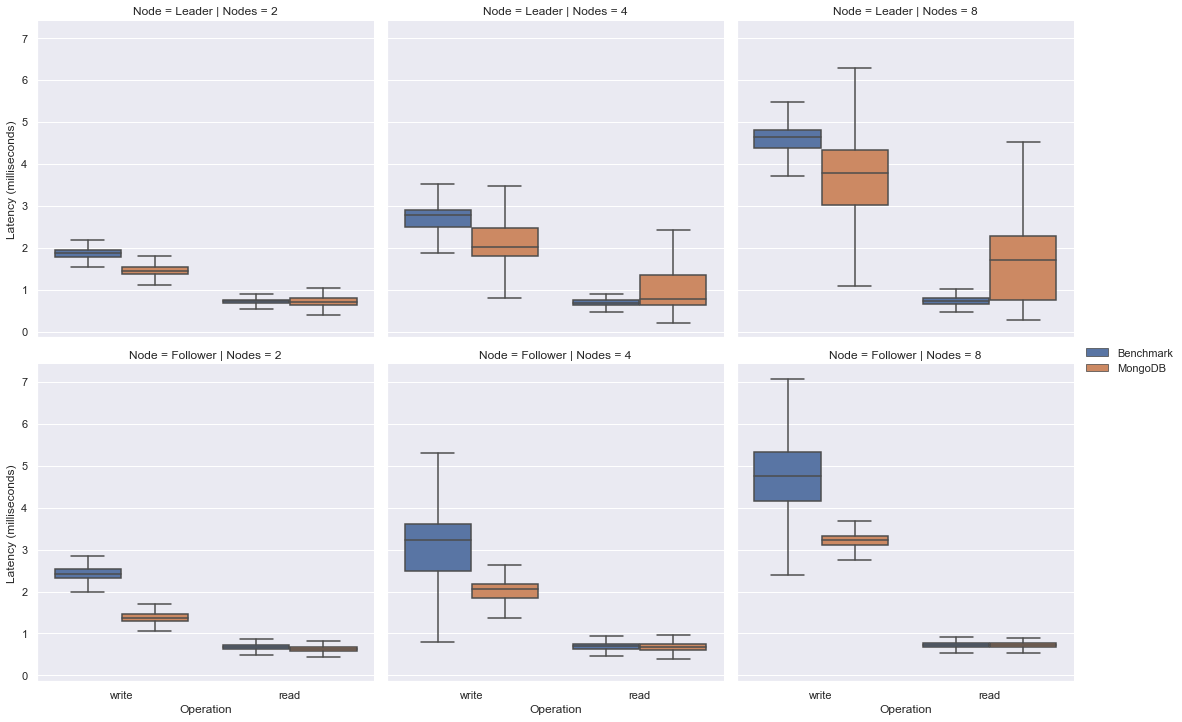

In [27]:
plt.figure(figsize=(8, 8))
ax = sns.catplot(kind="box", x="Operation", y="latency", hue="order_on_write", hue_order=[True, False], col="Nodes", row="Node", data=data_df, showfliers=False, legend=False)
ax.set_ylabels("Latency (milliseconds)")
ax.set_xlabels("Operation")


hue_labels = ['Benchmark', 'MongoDB']
ax.add_legend(legend_data={
    key: value for key, value in zip(hue_labels, ax._legend_data.values())
})

# leg_handles = ax.get_legend_handles_labels()[0]
# ax.legend(leg_handles, ['Benchmark', 'MongoDB'])
# plt.savefig("results/exp_1_on_leader_box.png")

# leg_handles = ax.get_legend_handles_labels()[0]
# ax.legend(leg_handles, ['Benchmark', 'MongoDB'])
plt.savefig("results/exp_1_on_leader.png", bbox_inches='tight')

In [28]:
# ax = None
# for group, group_df in agg_df.groupby(['system_name', 'operation']):
#     label = f"order_on_write={group[0]}, operation={group[1]}"
#     ax = group_df.plot(x='n_nodes', y='speedup', figsize=(24, 6), ax=ax, label=label)

# fig, axs = plt.subplots(2, 1, figsize=(20, 12))




for group, group_df in data_df.groupby(['operation']):
    print(group)
    sns.boxplot(x='n_nodes', y='latency', hue="order_on_write", data=group_df, showfliers=False)
    plt.show()

idx = 0
ax= None
for group, group_df in agg_df.groupby(['operation']):
    # display(group_df)
    # axs[idx].set_title(group_df.iloc[0, 1])
    ax = sns.barplot(ax=ax, x='n_nodes', y='latency', hue="order_on_write", data=group_df)
    idx += 1


KeyError: 'operation'

In [ ]:
q_df = data_df[data_df["latency"] < 3].groupby(['operation', 'n_nodes', 'order_on_write', 'on_leader']).latency.quantile([.8, .9, .91, .92, .93, .94, .95, .98, .99, .995, .999, .9999, .99999]).reset_index()

In [ ]:
ax = None


for group, group_df in q_df[q_df["n_nodes"] == 4].groupby(['operation',]):
    ax = None
    print(group)
    for group2, group_df2 in group_df[group_df["n_nodes"] == 4].groupby(['order_on_write', 'on_leader']):
        ax = group_df2.plot(x='level_4', y='latency', figsize=(12, 6), label=group2, ax=ax)
        ax.set_xlim(xmin=0.99)
        # sns.boxplot(x='n_nodes', y='latency', hue="order_on_write", data=group_df, showfliers=False)
    plt.show()

In [ ]:
agg_df_leader = df.groupby(['experiment', 'operation', 'run_id', 'n_nodes', 'order_on_write', 'on_leader']).latency.mean().reset_index()
agg_df_leader["latency_factor"] = agg_df_leader["latency"] / agg_df_leader["n_nodes"]

In [ ]:
fig, axs = plt.subplots(8, 1, figsize=(8, 18))

idx = 0
ax= None

agg_df_leader.groupby(["experiment", "order_on_write", 'operation']).plot(kind="bar", y='latency')



# sns.catplot(kind="bar", x="experiment", y="latency", hue="operation", col="order_on_write", row="n_nodes", data=agg_df_leader)

for group, group_df in agg_df_leader.groupby(["experiment", 'operation']):
    # display(group_df)
    # axs[idx].set_title(group_df.iloc[0, 1])
    axs[idx].set_title(f"order_on_write={group[0]}, operation={group[1]}")
    plt.title(str(group))
    plt.title(f"order_on_write={group[0]}, operation={group[1]}")
    # sns.barplot(x='experiment', y='latency', hue="on_leader", data=group_df)
    # plt.show()
    idx += 1

In [ ]:
# def speedup(sub_df):
#     two_nodes_df = sub_df[sub_df["n_nodes"] == 2]
#     sub_df["speedup"] = sub_df["latency"] / two_nodes_df["latency"].values
#     return sub_df
#
# agg_df_with_speedup = agg_df.groupby(['order_on_write', 'operation']).apply(speedup)

# fig = ax.get_figure()
# fig.savefig('results/figures/order_before_vs_after_write.pdf')